###### The plan for this notebook is as follows:
    
1. Open the player data and thier stats using Pandas into Dataframe and merge them to respective units
2. Clean up and store the merged data
3. Do some EDA using data visualization and then feature selection and extraction for better display
4. Try out different clustering algorithms
5. Visualize the results
6. Do some accuracy analysis

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer, MinMaxScaler

### Open the player data and thier stats using Pandas into Dataframe and merge them to respective units

In [31]:
players_data_csv = 'data/Players.csv'
players_stats_csv = 'data/Seasons_Stats.csv'
merged_data_csv = 'data/NBA_Stats.csv'

players_df = pd.read_csv(players_data_csv)
stats_df = pd.read_csv(players_stats_csv)

print("Total Number of Unique Players:",len(players_df))
print("Different Player Attributes:")
print(players_df.columns)
print("Different Player stats Attributes:")
print(stats_df.columns)
stats_df.head(10)

Total Number of Unique Players: 3922
Different Player Attributes:
Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
       'birth_city', 'birth_state'],
      dtype='object')
Different Player stats Attributes:
Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [33]:
#Interested Columns
player_columns = ['Player_Season','Player', 'height', 'weight']
stats_columns = ['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', '', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
interested_columns = player_columns + stats_columns

### Clean up and store the merged data

In [190]:
merged_df = pd.merge(players_df, stats_df, on='Player', how='inner')
min_games = 20
print("Number of player season combinations:",len(merged_df))
#Adding Season Index for players with multiple seasons
player_list = merged_df.Player.values.tolist()
players_seasons = list(map(lambda x: str(x[1]) + str(player_list[:x[0]].count(x[1]) + 1) if player_list.count(x[1]) > 1 else x[1], enumerate(mylist)))
merged_df['Player_Season'] = players_seasons
#Filter by minimum games and save
merged_df[merged_df['G'] > min_games].to_csv(merged_data_csv)

Number of player season combinations: 24691


### Once you saved initial data frame you can pick up the data from here

In [318]:
player_key = 'Player_Season'
indexed_df = pd.read_csv(merged_data_csv)[interested_columns].set_index(player_key)
#Classify data into Big and Wings
print("Different Player Positions:",list(set(indexed_df['Pos'].values)))
indexed_df['Type'] = indexed_df['Pos'].apply(lambda x: 'W' if x in ['SG','PG','SF','G','G-F','SG-PG','SG-SF',
                                                                   'SF-PG','PG-SG','PG-SF','SF-SG'] else 'B')
indexed_df['PPG'] = indexed_df['PTS']/indexed_df['G']
indexed_df['APG'] = indexed_df['AST']/indexed_df['G']
indexed_df['RPG'] = indexed_df['TRB']/indexed_df['G']
indexed_df.head(5)

Different Player Positions: ['C-SF', 'G', 'C', 'SF-PF', 'F', 'G-F', 'SG', 'SF', 'C-F', 'PF-C', 'SG-PG', 'SG-SF', 'SF-PG', 'PG-SG', 'PF', 'C-PF', 'F-G', 'F-C', 'PG-SF', 'PG', 'SF-SG', 'SG-PF', 'PF-SF']


,Player,height,weight,Year,Player,Pos,Age,Tm,G,GS,...,AST,STL,BLK,TOV,PF,PTS,Type,PPG,APG,RPG
Player_Season,,,,,,,,,,,,,,,,,,,,,
Curly Armstrong1,Curly Armstrong,180.0,77.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,...,176.0,NaN,NaN,NaN,217.0,458.0,W,7.269841,2.793651,NaN
Curly Armstrong2,Curly Armstrong,180.0,77.0,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,...,77.0,NaN,NaN,NaN,97.0,202.0,W,5.315789,2.026316,2.342105
Cliff Barker1,Cliff Barker,188.0,83.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,...,109.0,NaN,NaN,NaN,99.0,279.0,W,5.693878,2.224490,NaN
Cliff Barker2,Cliff Barker,188.0,83.0,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,...,115.0,NaN,NaN,NaN,98.0,152.0,W,2.714286,2.053571,1.785714
Cliff Barker3,Cliff Barker,188.0,83.0,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,...,70.0,NaN,NaN,NaN,56.0,126.0,W,2.863636,1.590909,1.840909


### EDA, Data Visualization, Feature Selection, Feature Extraction

In [319]:
indexed_df.loc['Dennis Rodman*9']

Player    Dennis Rodman*
height               201
weight                95
Year                1995
Player    Dennis Rodman*
Pos                   PF
Age                   33
Tm                   SAS
G                     49
GS                    26
MP                  1568
PER                 16.6
TS%                0.604
3PAr               0.008
FTr                0.463
ORB%                20.8
DRB%                37.8
TRB%                29.7
AST%                 8.5
STL%                   1
BLK%                   1
TOV%                25.3
USG%                10.9
blanl                NaN
OWS                  2.6
DWS                  3.2
WS                   5.8
WS/48              0.178
blank2               NaN
OBPM                 0.7
DBPM                 3.1
BPM                  3.8
VORP                 2.3
FG                   137
FGA                  240
FG%                0.571
3P                     0
3PA                    2
3P%                    0
2P                   137


In [320]:
indexed_df['APG'].describe()

count    19907.000000
mean         2.134003
std          1.850117
min          0.000000
25%          0.821429
50%          1.588235
75%          2.850532
max         14.538462
Name: APG, dtype: float64

### Normalizing the data

In [321]:
indexed_df.index.is_unique

True

In [322]:
min_max_scaler = MinMaxScaler()
imp=Imputer(missing_values=np.nan, strategy="mean" )
metrics = [  'height', 'weight','Age', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','PPG','APG','RPG']
norm_df = indexed_df
nan_df = imp.fit_transform(norm_df[metrics])
norm_df[metrics] = (nan_df-nan_df.mean())/nan_df.std()#pd.DataFrame(min_max_scaler.fit_transform(nan_df))
norm_df.head(5)

,Player,height,weight,Year,Player,Pos,Age,Tm,G,GS,...,AST,STL,BLK,TOV,PF,PTS,Type,PPG,APG,RPG
Player_Season,,,,,,,,,,,,,,,,,,,,,
Curly Armstrong1,Curly Armstrong,0.260939,-0.092914,1950.0,Curly Armstrong,G-F,-0.250945,FTW,-0.141010,-0.256755,...,0.247197,-0.189897,-0.254597,-0.046129,0.388051,1.215998,W,-0.332469,-0.347847,-0.343069
Curly Armstrong2,Curly Armstrong,0.260939,-0.092914,1951.0,Curly Armstrong,G-F,-0.247510,FTW,-0.226897,-0.256755,...,-0.092914,-0.189897,-0.254597,-0.046129,-0.024204,0.336519,W,-0.339182,-0.350483,-0.349398
Cliff Barker1,Cliff Barker,0.288423,-0.072301,1950.0,Cliff Barker,SG,-0.257816,INO,-0.189107,-0.256755,...,0.017021,-0.189897,-0.254597,-0.046129,-0.017334,0.601050,W,-0.337883,-0.349802,-0.343069
Cliff Barker2,Cliff Barker,0.288423,-0.072301,1951.0,Cliff Barker,SG,-0.254380,INO,-0.165058,-0.256755,...,0.037634,-0.189897,-0.254597,-0.046129,-0.020769,0.164746,W,-0.348120,-0.350389,-0.351310
Cliff Barker3,Cliff Barker,0.288423,-0.072301,1952.0,Cliff Barker,SG,-0.250945,INO,-0.206284,-0.256755,...,-0.116962,-0.189897,-0.254597,-0.046129,-0.165058,0.075424,W,-0.347606,-0.351979,-0.351120


In [323]:
norm_df.describe()

,height,weight,Year,Age,G,GS,MP,PER,TS%,3PAr,...,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,APG,RPG
count,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,...,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000,19907.000000
mean,0.327822,-0.029281,1992.223941,-0.265575,-0.149068,-0.256755,4.689331,-0.311112,-0.355701,-0.356897,...,0.581000,0.123161,-0.189897,-0.254597,-0.046129,0.126292,1.779575,-0.324967,-0.350113,-0.343069
std,0.031999,0.041085,17.433426,0.013186,0.064949,0.086325,2.924567,0.014138,0.000203,0.000545,...,0.777937,0.479826,0.120182,0.123582,0.200643,0.259998,1.663665,0.020570,0.006356,0.009828
min,0.192230,-0.151317,1950.000000,-0.295606,-0.285300,-0.357444,-0.144446,-0.366720,-0.356771,-0.357444,...,-0.350573,-0.357444,-0.357444,-0.357444,-0.354009,-0.343702,-0.336832,-0.356585,-0.357444,-0.357146
25%,0.305600,-0.061995,1980.000000,-0.274993,-0.199413,-0.336832,2.150443,-0.320341,-0.355819,-0.357393,...,0.013586,-0.213155,-0.278429,-0.329961,-0.192542,-0.092914,0.446454,-0.341111,-0.354622,-0.350101
50%,0.333084,-0.031075,1995.000000,-0.268122,-0.130704,-0.256755,4.520913,-0.311753,-0.355685,-0.356897,...,0.381180,-0.031075,-0.189897,-0.281864,-0.046129,0.109779,1.353416,-0.329732,-0.351988,-0.345594
75%,0.350261,-0.000156,2007.000000,-0.257816,-0.089478,-0.220026,7.018494,-0.303164,-0.355569,-0.356692,...,0.899935,0.298729,-0.144446,-0.250945,0.023892,0.319342,2.698400,-0.313105,-0.347651,-0.338786
max,0.436148,0.154440,2017.000000,-0.209719,-0.055124,-0.072301,12.979022,-0.248197,-0.354827,-0.354205,...,7.025365,3.641434,0.676630,1.209127,1.236610,0.968644,13.484035,-0.184426,-0.307498,-0.263991


### Type of Players in NBA History by Position (Each Player Season is unique)

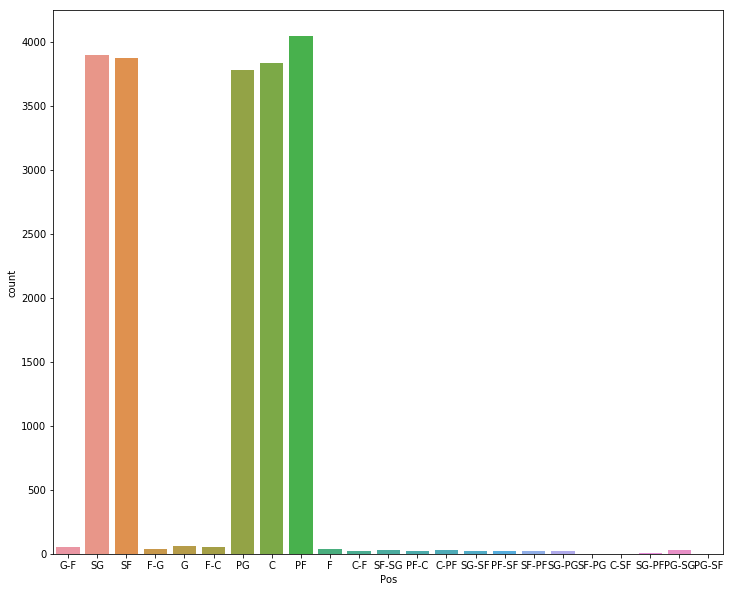

In [324]:
plt.subplots(figsize=(12,10))
ax = sns.countplot(indexed_df['Pos'],label="Count")
plt.show()

### Visualize the data using Violin Visualization

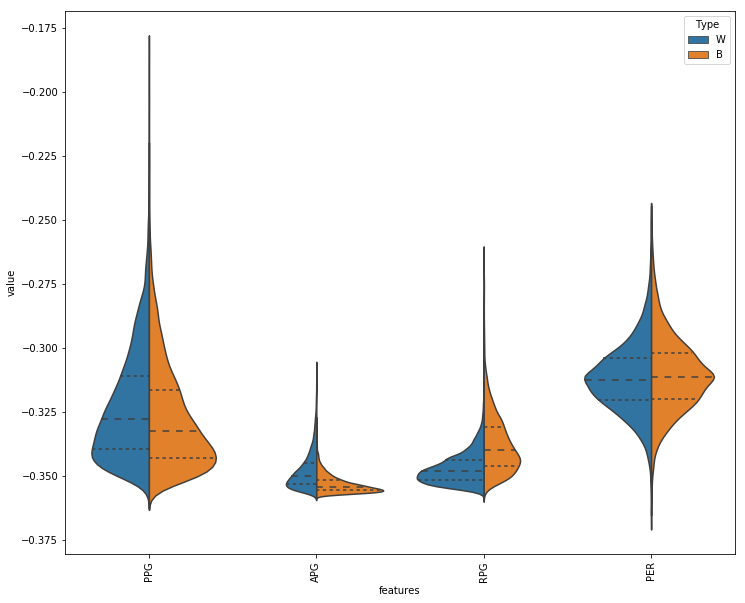

In [325]:
data = pd.melt(norm_df,id_vars=["Type","Pos"],value_vars=["PPG","APG","RPG","PER"],
                    var_name="features",
                    value_name="value")
plt.subplots(figsize=(12,10))
sns.violinplot(x="features", y="value", hue="Type", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

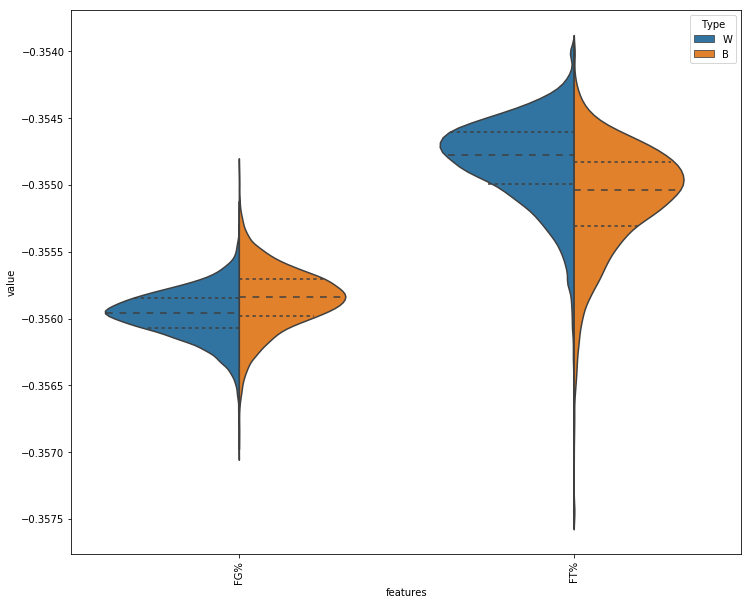

In [326]:
data = pd.melt(norm_df,id_vars=["Type","Pos"],value_vars=["FG%","FT%"],
                    var_name="features",
                    value_name="value")
plt.subplots(figsize=(12,10))
sns.violinplot(x="features", y="value", hue="Type", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

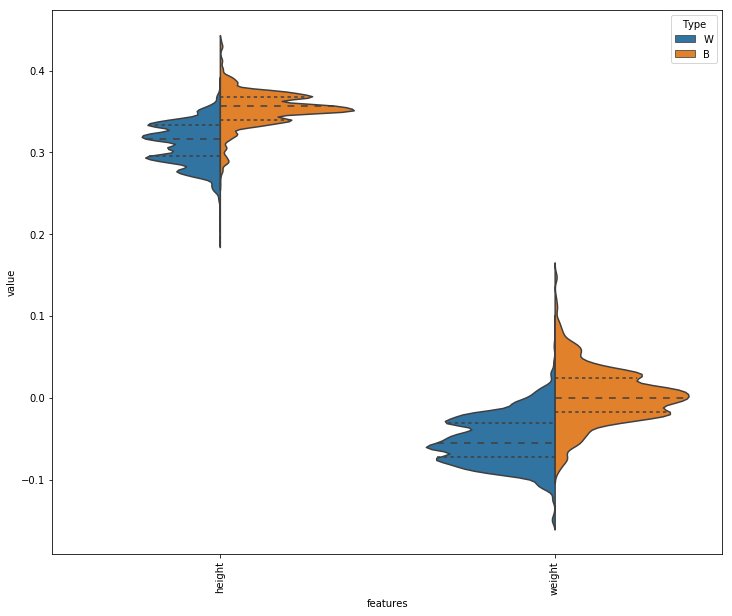

In [327]:
data = pd.melt(norm_df,id_vars=["Type","Pos"],value_vars=['height', 'weight'],
                    var_name="features",
                    value_name="value")
plt.subplots(figsize=(12,10))
sns.violinplot(x="features", y="value", hue="Type", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

### Another Feature Based Visualization - Swarm Plot (Might be too large to visualize everything)

In [328]:
# data = pd.melt(norm_df,id_vars=["Type","Pos"],value_vars=["PPG","APG","RPG","PER"],
#                     var_name="features",
#                     value_name="value")
# plt.subplots(figsize=(12,10))
# sns.swarmplot(x="features", y="value", hue="Type", data=data)
# plt.xticks(rotation=90)
# plt.show()

### Correlation Between all the features

In [332]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

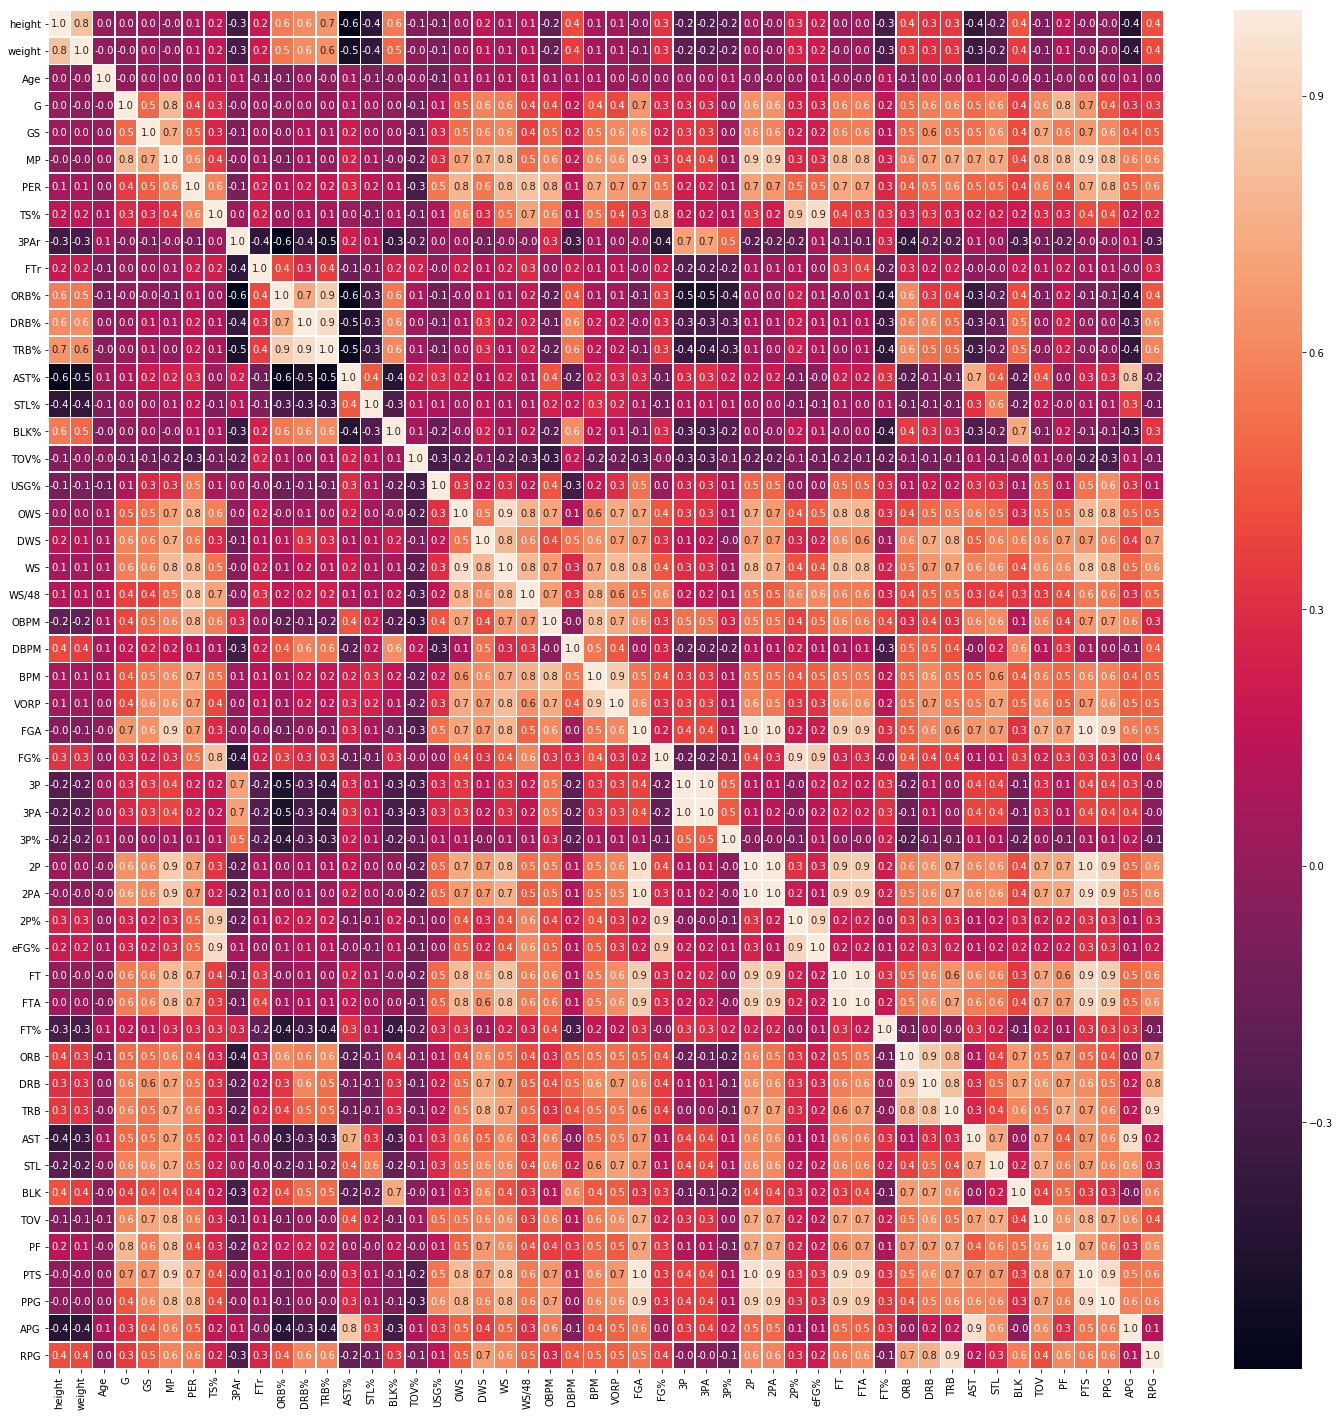

In [333]:
#correlation map
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(norm_df[metrics].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### Feature Selection with Correlation

In [335]:
#Columns that can be removed because of correlation.
#Below columns are picked to be removed after looking at the correlation matrix above
redund_attributes = ['FGA','3P','2P','3PA','2PA','FTA','eFG%']
new_metrics = list(set(metrics) - set(redund_attributes))

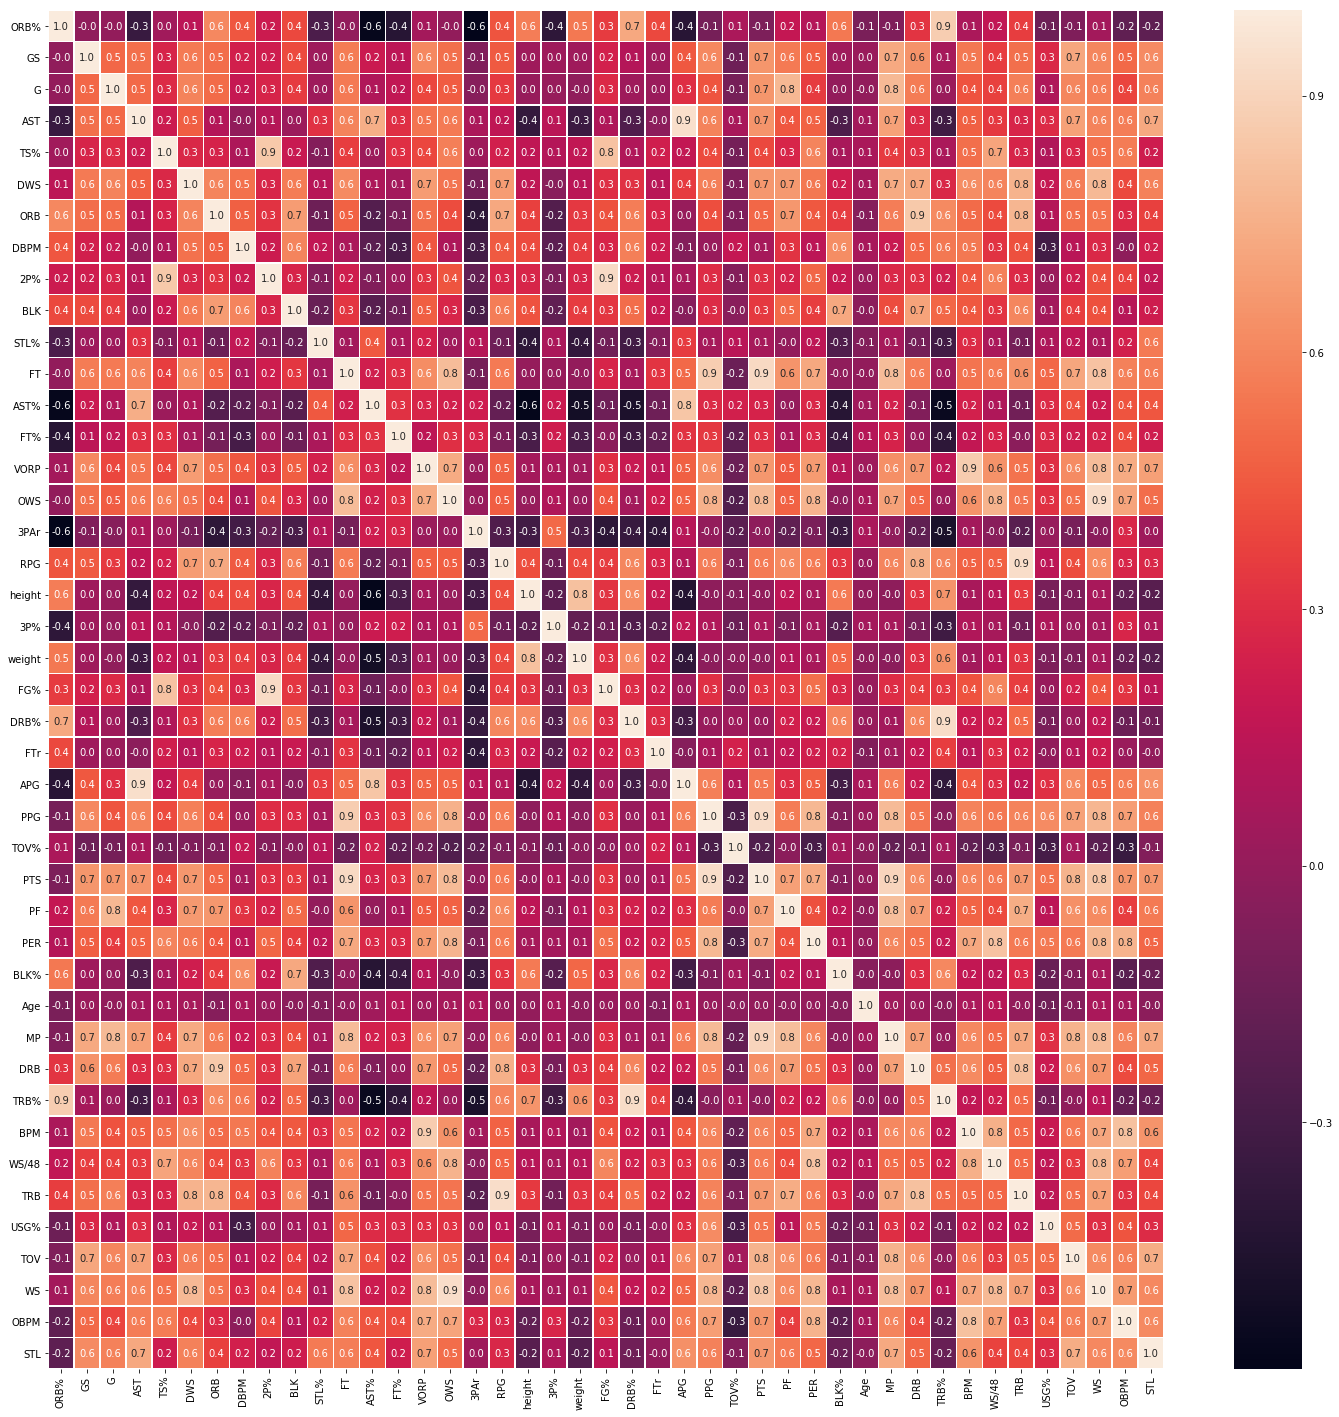

In [336]:
#New Correlation Map after filtering out redundant features - Note no 1.0 correlation to any other feature
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(norm_df[new_metrics].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()